In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df=pd.read_csv('german_credit_data_with_target.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
df.describe() #stats about the dataset

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


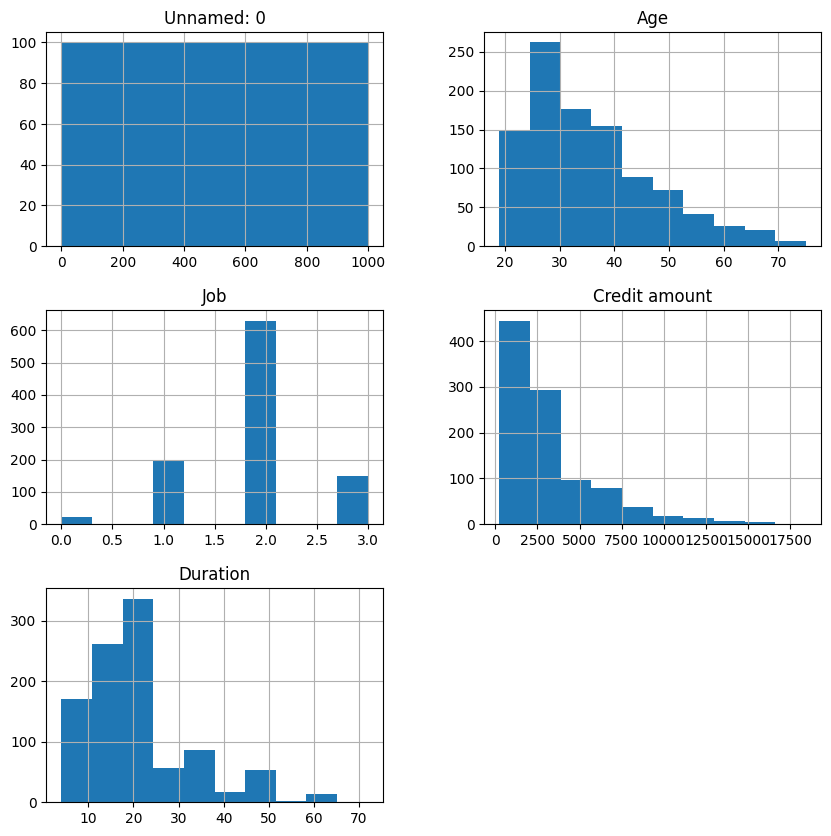

In [4]:
df.hist(figsize=(10, 10))#distribution of values in different numeric columns
plt.show()

In [5]:
#for missing values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
df['Saving accounts'].fillna('unknown',inplace=True)#as the values are not random its best to use unknown
df['Checking account'].fillna('unknown',inplace=True)

C:\Users\HOME\AppData\Local\Temp\ipykernel_8884\96521048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown',inplace=True)#as the values are not random its best to use unknown
C:\Users\HOME\AppData\Local\Temp\ipykernel_8884\96521048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [7]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1544c9d6300>,
 'caps': [<matplotlib.lines.Line2D at 0x1544fd565d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1544fd55f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1544fd56ae0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1544fd56de0>],
 'means': []}

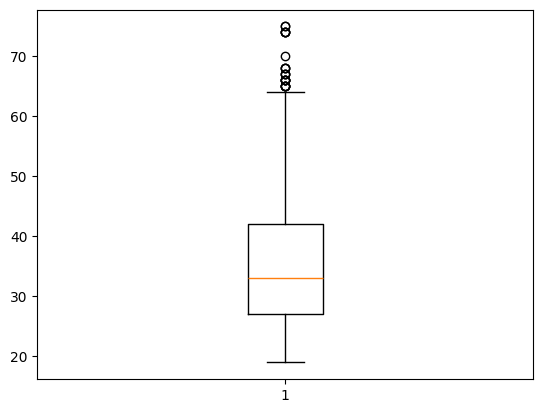

In [8]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1544fd9bf20>,
 'caps': [<matplotlib.lines.Line2D at 0x1544fd80470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1544fd9bd10>],
 'medians': [<matplotlib.lines.Line2D at 0x1544f5f1790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1544f5f06b0>],
 'means': []}

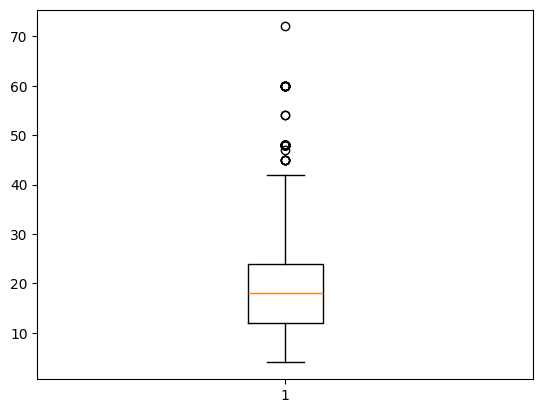

In [9]:
plt.boxplot(df['Duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1544f642810>,
 'caps': [<matplotlib.lines.Line2D at 0x1544f5f1670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1544f6419d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1544f640e30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1544f643770>],
 'means': []}

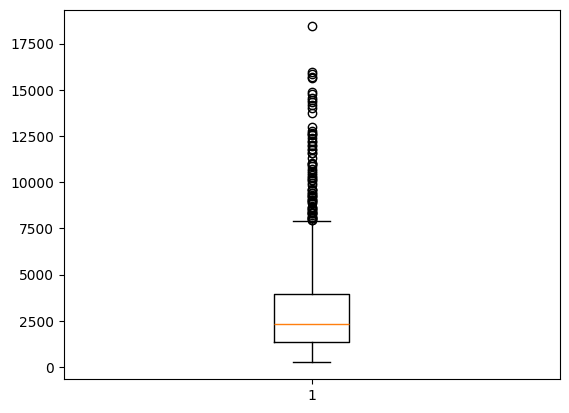

In [10]:
plt.boxplot(df['Credit amount'])

In [11]:
#encoding categorical columns to numerical columns so that they can work with scikit learn
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose','Risk']

# dictionary used for decoding
label_encoders = {}

for val in categorical:
    le = LabelEncoder()  
    df[val] = le.fit_transform(df[val])  
    label_encoders[val] = le  

In [12]:
#standardization of columns
scaling = ['Age', 'Duration', 'Credit amount']
scaler = StandardScaler()
df[scaling] = scaler.fit_transform(df[scaling])


In [13]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,2.766456,1,2,1,4,0,-0.745131,-1.236478,5,1
1,1,-1.191404,0,2,1,0,1,0.949817,2.248194,5,0
2,2,1.183312,1,1,1,0,3,-0.416562,-0.738668,3,1
3,3,0.831502,1,2,0,0,0,1.634247,1.750384,4,1
4,4,1.535122,1,2,0,0,0,0.566664,0.256953,1,0


In [14]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [15]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,1,2,1,4,0,-0.745131,-1.236478,5,1
1,-1.191404,0,2,1,0,1,0.949817,2.248194,5,0
2,1.183312,1,1,1,0,3,-0.416562,-0.738668,3,1
3,0.831502,1,2,0,0,0,1.634247,1.750384,4,1
4,1.535122,1,2,0,0,0,0.566664,0.256953,1,0


In [16]:
x=df.drop("Risk",axis=1)#features
y=df["Risk"]#labels

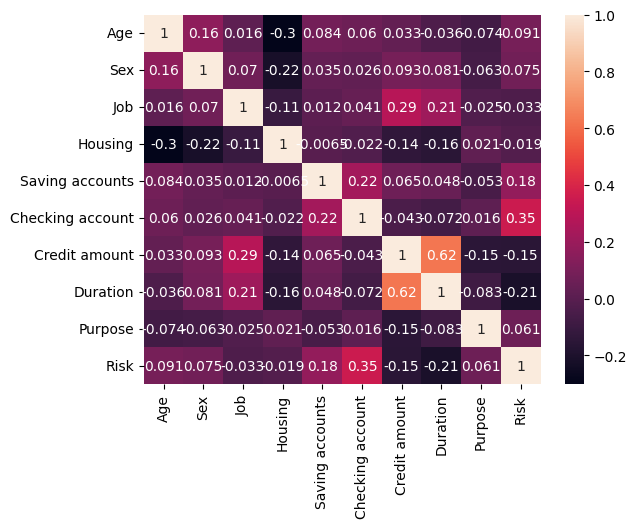

In [17]:
#heatmap
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()


In [18]:
#splitting dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=52)
#training Model
model = RandomForestClassifier(random_state=52)
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)

In [19]:
#Metrics
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        60
           1       0.79      0.86      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.73      0.74      0.73       200


Confusion Matrix for Best Model:
[[ 28  32]
 [ 20 120]]


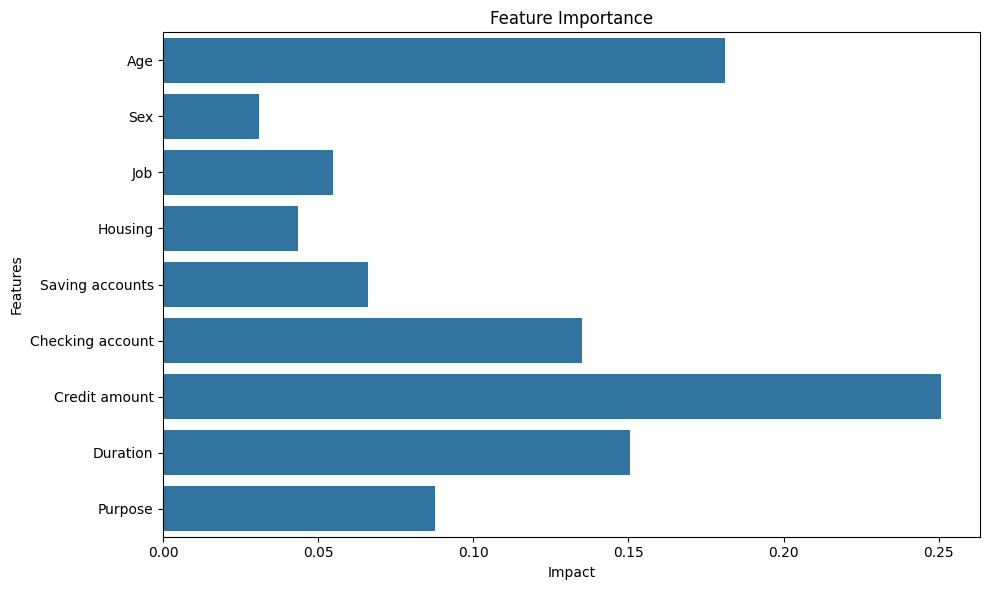

In [20]:
# Plot feature importance
importances = model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Impact")
plt.ylabel("Features")
plt.tight_layout()
plt.show() #it shows Credit Amount Plays a very big role in credit risk also the checking account,duration and Age is also a Crucial factor
#the institutes should charge higher intrest rate for Large Credit and longer Duration Loans